# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

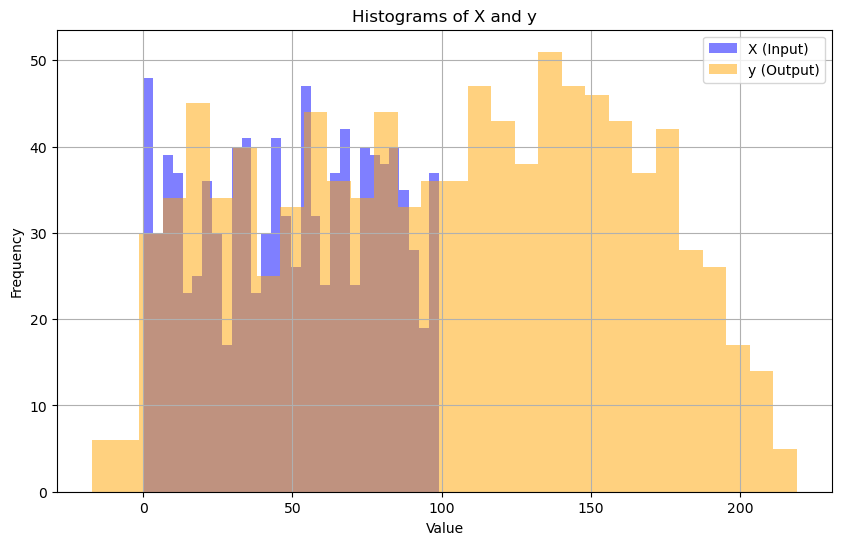

In [2]:
X = np.random.randint(0, 100, 1000)
y = 2 * X + 3 + np.random.randn(1000) * 10  
plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, alpha=0.5, label='X (Input)', color='blue')
plt.hist(y, bins=30, alpha=0.5, label='y (Output)', color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
X_Train,X_test,y_Train,y_Test=train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_Train = np.array(X_Train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
scaler = MinMaxScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_test)

In [5]:
model=LinearRegression()
model.fit(X_Train_scaled,y_Train)

LinearRegression()

In [6]:
y_train_pred=model.predict(X_Train_scaled)
y_test_pred=model.predict(X_Test_scaled)

In [7]:
train_mae = mean_absolute_error(y_Train, y_train_pred)
train_mse = mean_squared_error(y_Train, y_train_pred)
train_r2 = r2_score(y_Train, y_train_pred)
test_mae = mean_absolute_error(y_Test, y_test_pred)
test_mse = mean_squared_error(y_Test, y_test_pred)
test_r2 = r2_score(y_Test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Training Metrics:
MAE: 7.85, MSE: 100.11, R²: 0.97

Test Metrics:
MAE: 8.24, MSE: 110.37, R²: 0.97


X_Train shape: (800, 1)
y_Train shape: (800,)
X_Test shape: (200, 1)
y_Test shape: (200,)


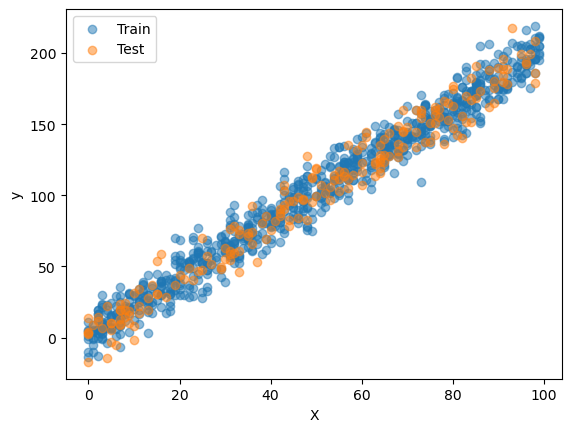

In [8]:
print("X_Train shape:", X_Train.shape)
print("y_Train shape:", y_Train.shape)
print("X_Test shape:", X_test.shape)
print("y_Test shape:", y_Test.shape)
plt.scatter(X_Train, y_Train, alpha=0.5, label='Train')
plt.scatter(X_test, y_Test, alpha=0.5, label='Test')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

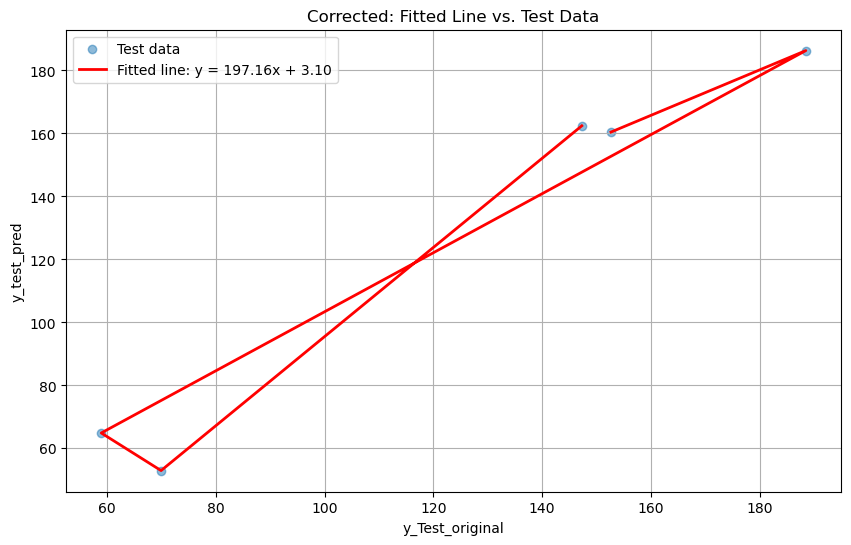

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_Test[:5], y_test_pred[:5], alpha=0.5, label='Test data')
plt.plot(y_Test[:5], y_test_pred[:5], color='red', linewidth=2, 
         label=f'Fitted line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.xlabel('y_Test_original')
plt.ylabel('y_test_pred')
plt.title('Corrected: Fitted Line vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [10]:
X1 = np.random.randint(0, 100, 1000)
X2 = np.random.randint(0, 100, 1000)
x = np.column_stack((X1, X2))
print(x.shape)
y = 2 * X1 + 2 * X2 + 3 + np.random.randn(1000) * 10  

(1000, 2)


In [11]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

Shape of x: (1000, 2)
Shape of y: (1000,)


In [12]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [14]:
y_train_pred=model.predict(x_train_scaled)
y_test_pred=model.predict(x_test_scaled)

In [15]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Training Metrics:
MAE: 7.81, MSE: 97.10, R²: 0.99

Test Metrics:
MAE: 7.61, MSE: 94.78, R²: 0.99


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [16]:
X1 = np.random.randint(0, 100, 1000)
X2 = np.random.randint(0, 100, 1000)
x = np.column_stack((X1, X2))
print(x.shape)
y = 2 * X1 + 2 * X2 + 3 + np.random.randn(1000) * 10  

(1000, 2)


In [17]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

Shape of x: (1000, 2)
Shape of y: (1000,)


In [18]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)

In [20]:
# Create and train the model
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

In [21]:
y_train_pred=model.predict(x_poly_train)
y_test_pred=model.predict(x_poly_test)

In [22]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Training Metrics:
MAE: 7.81, MSE: 92.55, R²: 0.99

Test Metrics:
MAE: 8.19, MSE: 102.62, R²: 0.99


## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [23]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Access\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [24]:
os.listdir(path)

['airlines_flights_data.csv']

In [25]:
full_path = os.path.join(path,os.listdir(path)[0])

In [165]:
import pandas as pd
df = pd.read_csv(full_path)

In [166]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [167]:
df=df.drop("flight",axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


In [37]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [179]:
print(df.isnull().sum())

index             0
airline           0
departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
route             0
dtype: int64


In [180]:
print(df.duplicated().sum())
df['route'] = df['source_city'] + '_' + df['destination_city']
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    drop='if_binary',
    handle_unknown='ignore',
    dtype=np.int8
)
columns_to_encode=["route","airline"]
encoded_data = one_hot_encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(
    encoded_data,
    columns=one_hot_encoder.get_feature_names_out(columns_to_encode),
    index=df.index
)
print("\nPost-encoding validation:")
print(f"Encoded columns: {list(encoded_df.columns)}")
print(f"Encoded data shape: {encoded_data.shape}")
df = pd.concat([df, encoded_df], axis=1)
print("\nSource city column after encoding:")
print(list(df.columns))

0

Post-encoding validation:
Encoded columns: ['route_Bangalore_Chennai', 'route_Bangalore_Delhi', 'route_Bangalore_Hyderabad', 'route_Bangalore_Kolkata', 'route_Bangalore_Mumbai', 'route_Chennai_Bangalore', 'route_Chennai_Delhi', 'route_Chennai_Hyderabad', 'route_Chennai_Kolkata', 'route_Chennai_Mumbai', 'route_Delhi_Bangalore', 'route_Delhi_Chennai', 'route_Delhi_Hyderabad', 'route_Delhi_Kolkata', 'route_Delhi_Mumbai', 'route_Hyderabad_Bangalore', 'route_Hyderabad_Chennai', 'route_Hyderabad_Delhi', 'route_Hyderabad_Kolkata', 'route_Hyderabad_Mumbai', 'route_Kolkata_Bangalore', 'route_Kolkata_Chennai', 'route_Kolkata_Delhi', 'route_Kolkata_Hyderabad', 'route_Kolkata_Mumbai', 'route_Mumbai_Bangalore', 'route_Mumbai_Chennai', 'route_Mumbai_Delhi', 'route_Mumbai_Hyderabad', 'route_Mumbai_Kolkata', 'airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara']
Encoded data shape: (300098, 36)

Source city column after encoding:
['index

In [181]:
# Check for duplicates
print(df.duplicated().sum())
label_encoders = {}
encoded_df = pd.DataFrame(index=df.index) 
columns_to_encode = ['departure_time', 'stops', 'arrival_time','class']
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    encoded_values = label_encoders[column].fit_transform(df[column])
    encoded_values = encoded_values.astype(np.int8)
    encoded_df[f"{column}_encoded"] = encoded_values
print("\nPost-encoding validation:")
print(f"Encoded columns: {list(encoded_df.columns)}")
print(f"Encoded data shape: {encoded_df.shape}")
print(f"Data types: {encoded_df.dtypes}")
df = df.drop(columns=columns_to_encode, errors='ignore')
df = pd.concat([df, encoded_df], axis=1)
print("\nEncoded columns in the final dataframe:")
print(list(df.columns))
for column in columns_to_encode:
    print(f"\nMapping for {column}:")
    for i, category in enumerate(label_encoders[column].classes_):
        print(f"{category} -> {i}")

0

Post-encoding validation:
Encoded columns: ['departure_time_encoded', 'stops_encoded', 'arrival_time_encoded', 'class_encoded']
Encoded data shape: (300098, 4)
Data types: departure_time_encoded    int8
stops_encoded             int8
arrival_time_encoded      int8
class_encoded             int8
dtype: object

Encoded columns in the final dataframe:
['index', 'airline', 'duration', 'days_left', 'price', 'route', 'route_Bangalore_Chennai', 'route_Bangalore_Delhi', 'route_Bangalore_Hyderabad', 'route_Bangalore_Kolkata', 'route_Bangalore_Mumbai', 'route_Chennai_Bangalore', 'route_Chennai_Delhi', 'route_Chennai_Hyderabad', 'route_Chennai_Kolkata', 'route_Chennai_Mumbai', 'route_Delhi_Bangalore', 'route_Delhi_Chennai', 'route_Delhi_Hyderabad', 'route_Delhi_Kolkata', 'route_Delhi_Mumbai', 'route_Hyderabad_Bangalore', 'route_Hyderabad_Chennai', 'route_Hyderabad_Delhi', 'route_Hyderabad_Kolkata', 'route_Hyderabad_Mumbai', 'route_Kolkata_Bangalore', 'route_Kolkata_Chennai', 'route_Kolkata_Del

In [188]:
df=df.drop(["airline"],axis=1)
df=df.drop(["index"],axis=1)
df=df.drop(["route"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300098 entries, 0 to 300152
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   price                      300098 non-null  int64  
 1   route_Bangalore_Chennai    300098 non-null  int8   
 2   route_Bangalore_Delhi      300098 non-null  int8   
 3   route_Bangalore_Hyderabad  300098 non-null  int8   
 4   route_Bangalore_Kolkata    300098 non-null  int8   
 5   route_Bangalore_Mumbai     300098 non-null  int8   
 6   route_Chennai_Bangalore    300098 non-null  int8   
 7   route_Chennai_Delhi        300098 non-null  int8   
 8   route_Chennai_Hyderabad    300098 non-null  int8   
 9   route_Chennai_Kolkata      300098 non-null  int8   
 10  route_Chennai_Mumbai       300098 non-null  int8   
 11  route_Delhi_Bangalore      300098 non-null  int8   
 12  route_Delhi_Chennai        300098 non-null  int8   
 13  route_Delhi_Hyderabad      300098 

In [192]:
scaler=MinMaxScaler()
df[["duration_scaled","days_left_scaled"]]=scaler.fit_transform(df[["duration","days_left"]])
df=df.drop(["duration","days_left"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300098 entries, 0 to 300152
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   price                      300098 non-null  int64  
 1   route_Bangalore_Chennai    300098 non-null  int8   
 2   route_Bangalore_Delhi      300098 non-null  int8   
 3   route_Bangalore_Hyderabad  300098 non-null  int8   
 4   route_Bangalore_Kolkata    300098 non-null  int8   
 5   route_Bangalore_Mumbai     300098 non-null  int8   
 6   route_Chennai_Bangalore    300098 non-null  int8   
 7   route_Chennai_Delhi        300098 non-null  int8   
 8   route_Chennai_Hyderabad    300098 non-null  int8   
 9   route_Chennai_Kolkata      300098 non-null  int8   
 10  route_Chennai_Mumbai       300098 non-null  int8   
 11  route_Delhi_Bangalore      300098 non-null  int8   
 12  route_Delhi_Chennai        300098 non-null  int8   
 13  route_Delhi_Hyderabad      300098 

In [193]:
x=df.drop("price",axis=1)
y=df["price"]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300098 entries, 0 to 300152
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   route_Bangalore_Chennai    300098 non-null  int8   
 1   route_Bangalore_Delhi      300098 non-null  int8   
 2   route_Bangalore_Hyderabad  300098 non-null  int8   
 3   route_Bangalore_Kolkata    300098 non-null  int8   
 4   route_Bangalore_Mumbai     300098 non-null  int8   
 5   route_Chennai_Bangalore    300098 non-null  int8   
 6   route_Chennai_Delhi        300098 non-null  int8   
 7   route_Chennai_Hyderabad    300098 non-null  int8   
 8   route_Chennai_Kolkata      300098 non-null  int8   
 9   route_Chennai_Mumbai       300098 non-null  int8   
 10  route_Delhi_Bangalore      300098 non-null  int8   
 11  route_Delhi_Chennai        300098 non-null  int8   
 12  route_Delhi_Hyderabad      300098 non-null  int8   
 13  route_Delhi_Kolkata        300098 

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [195]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [196]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [197]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, R²: {train_r2:.2f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Training Metrics:
MAE: 4627.22, MSE: 46796103.15, R²: 0.91

Test Metrics:
MAE: 4572.65, MSE: 46012756.09, R²: 0.91


In [198]:
from joblib import dump
dump(model, 'flight_price_linear_regression.joblib')

['flight_price_linear_regression.joblib']

In [174]:
seventy_fifth = df.groupby("airline")["duration"].quantile(0.75)
twenty_fifth = df.groupby("airline")["duration"].quantile(0.25)
salaries_iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (1.5 * salaries_iqr)
lower = twenty_fifth - (1.5 * salaries_iqr)
seventy_fifth = df.groupby("class")["duration"].quantile(0.75)
twenty_fifth = df.groupby("class")["duration"].quantile(0.25)
salaries_iqr = seventy_fifth - twenty_fifth
upper = seventy_fifth + (1.5 * salaries_iqr)
lower = twenty_fifth - (1.5 * salaries_iqr)
df = df.drop(df[(df["airline"]=="Indigo") & (df["duration"] > 14.995)].index)
df = df.drop(df[(df["airline"]=="GO_FIRST") & (df["duration"] > 20.235)].index)
df = df.drop(df[(df["airline"]=="Air_India") & (df["duration"] == np.max(df["duration"]))].index)
df = df.drop(df[(df["airline"]=="Vistara") & (df["duration"] == np.max(df["duration"]))].index)
df = df.drop(df[(df["price"] == np.max(df["price"]))].index)
df = df.drop(df[(df["class"]=="Economy") & (df["duration"] == np.max(df["duration"]))].index)
df = df.drop(df[(df["class"]=="Business") & (df["duration"] == np.max(df["duration"]))].index)

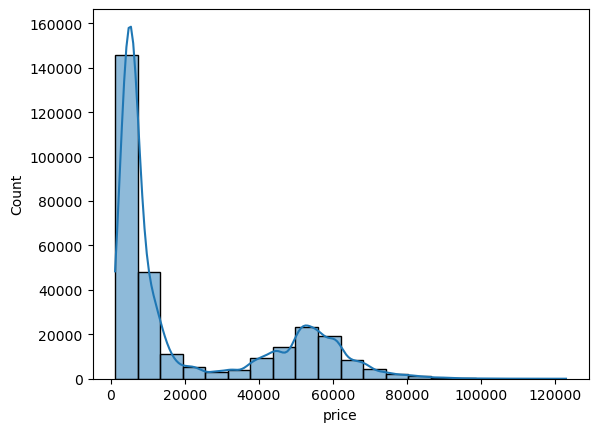

In [144]:
sns.histplot(data=df, x="price", bins=20, alpha=0.5, kde=True)
plt.show()

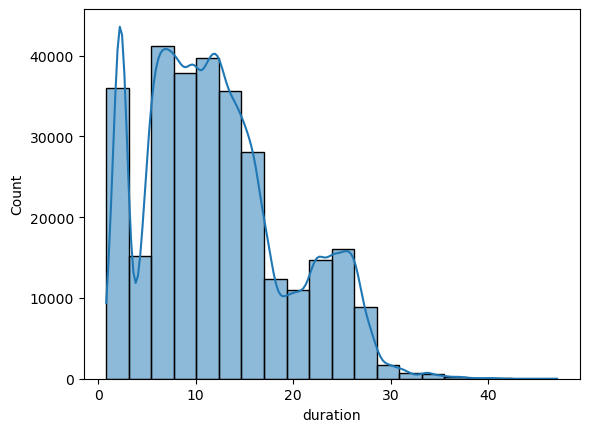

In [67]:
sns.histplot(data=df, x="duration", bins=20, alpha=0.5, kde=True)
plt.show()

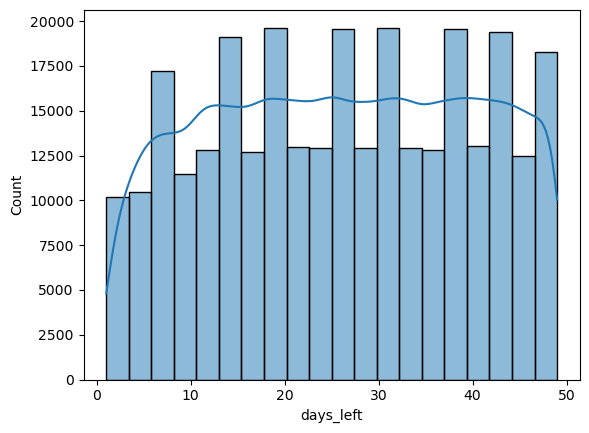

In [68]:
sns.histplot(data=df, x="days_left", bins=20, alpha=0.5, kde=True)
plt.show()

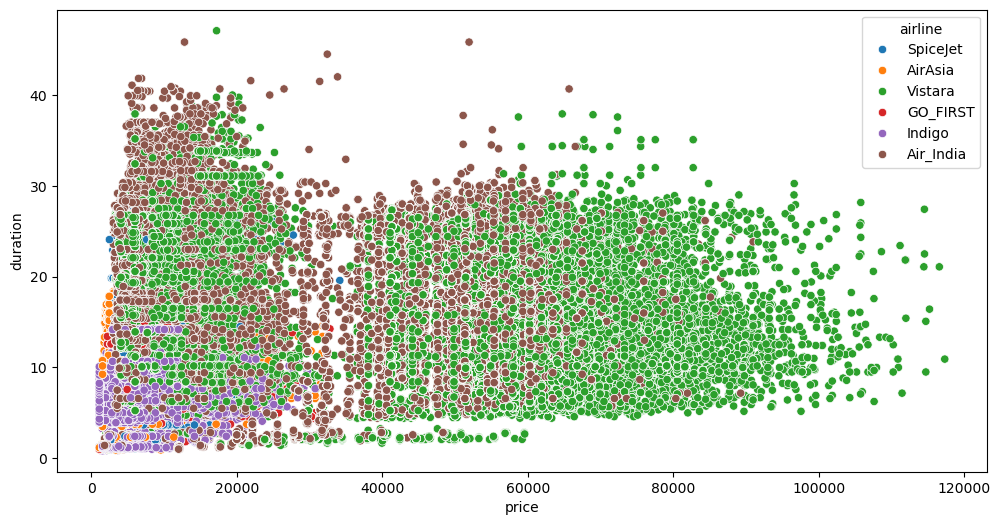

In [69]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="price",y="duration",hue="airline",data=df)
plt.show()

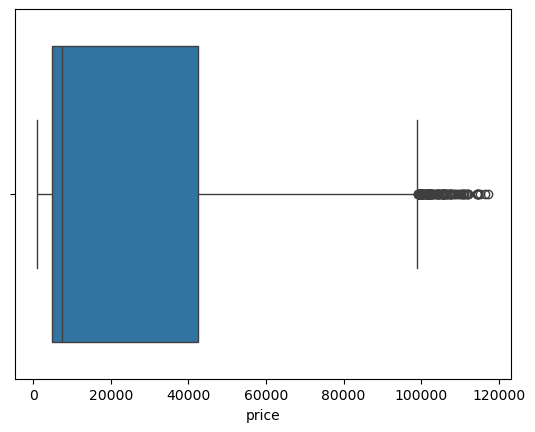

In [171]:
sns.boxplot(data=df, x="price")
plt.show()

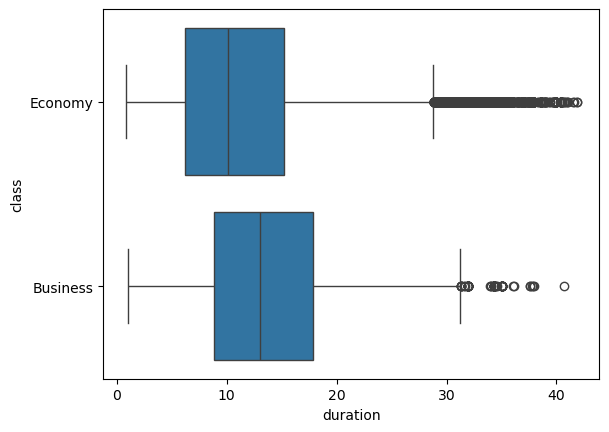

In [176]:
sns.boxplot(data=df, x="duration",y="class")
plt.show()

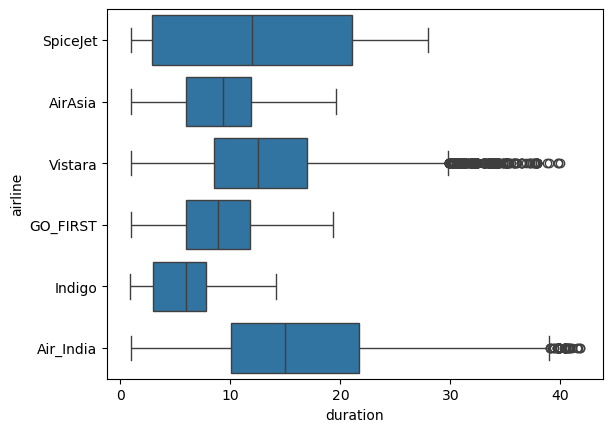

In [175]:
sns.boxplot(data=df, x="duration",y="airline")
plt.show()

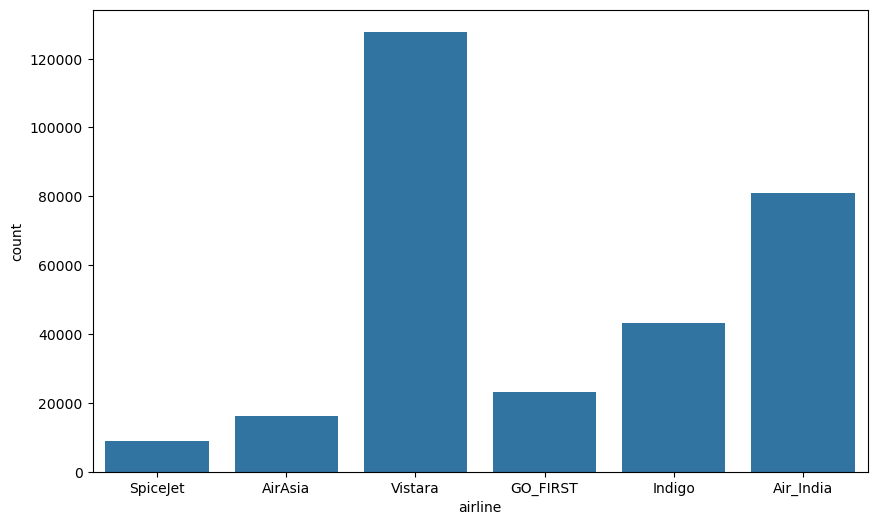

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x="airline",data=df)
plt.show()

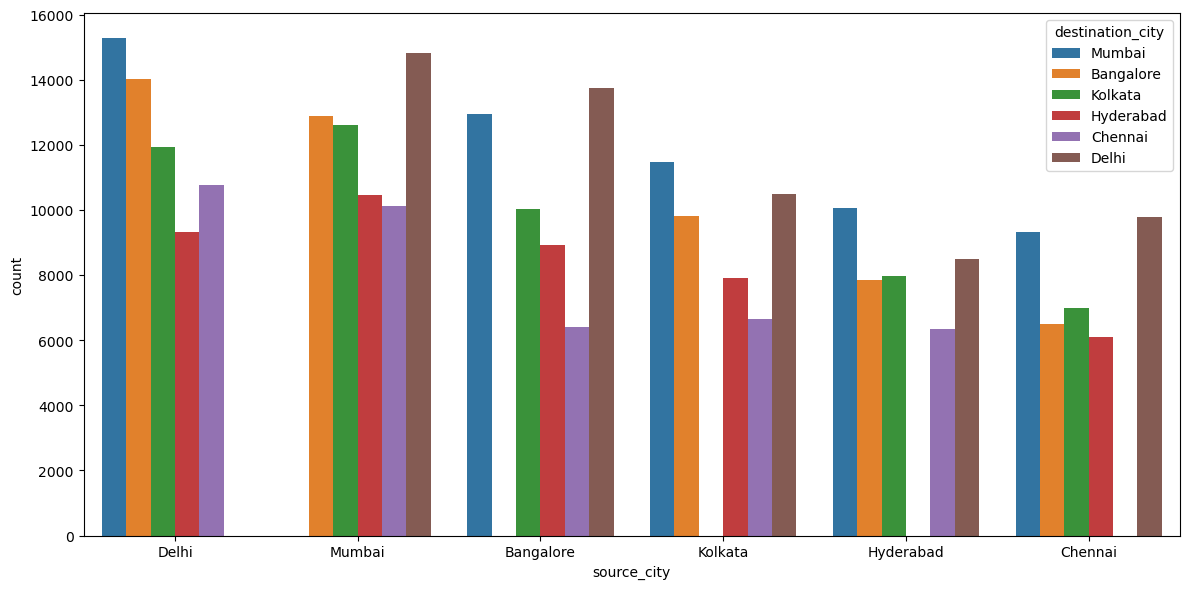

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x="source_city", hue="destination_city", data=df)
plt.tight_layout()
plt.show()

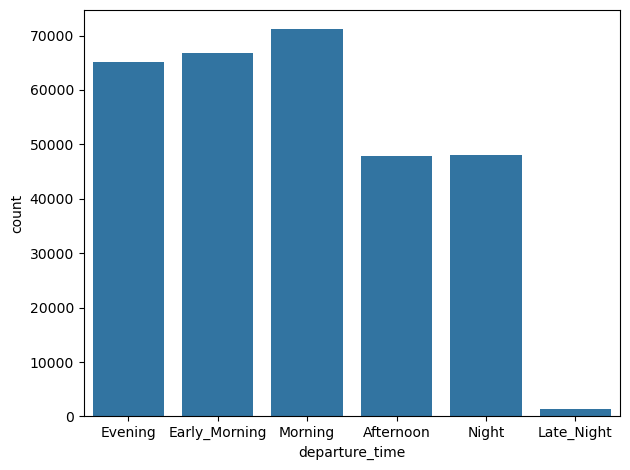

In [75]:
sns.countplot(x="departure_time", data=df)
plt.tight_layout()
plt.show()

<Axes: xlabel='airline,class'>

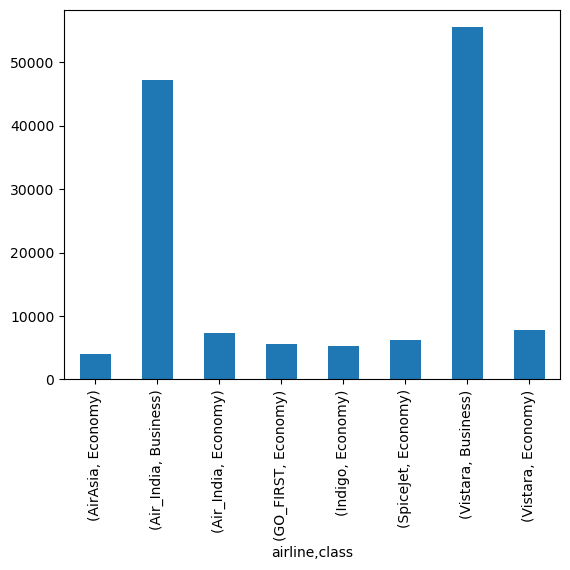

In [76]:
df.groupby(["airline","class"])["price"].mean().plot(kind="bar")

<Axes: xlabel='source_city,destination_city'>

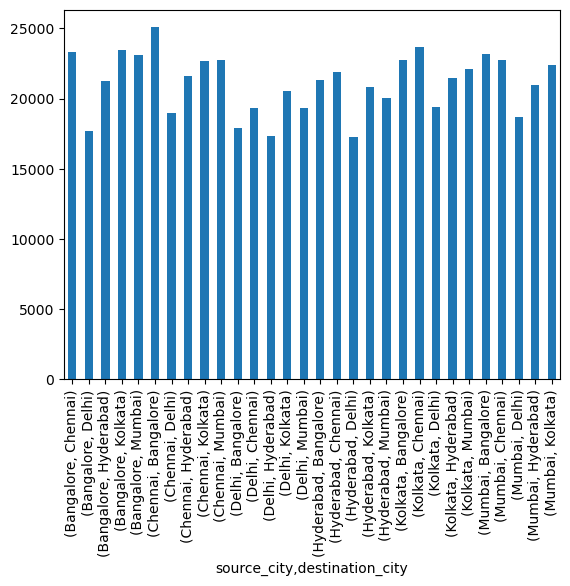

In [77]:
df.groupby(["source_city","destination_city"])["price"].mean().plot(kind="bar")

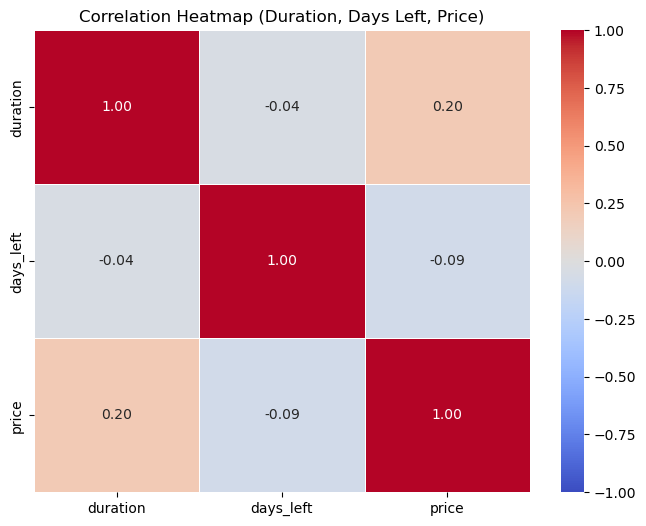

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df[['duration', 'days_left', 'price']]

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Heatmap (Duration, Days Left, Price)")
plt.show()

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
